<a href="https://colab.research.google.com/github/jyo-11/Student-Performance-Predictor/blob/main/student_performance_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [3]:
# load the dataset

df= pd.read_csv('/content/student-mat (1).csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#Encode categorical features
label_encoder={}
categorical_columns= df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  le= LabelEncoder()
  df[col]= le.fit_transform(df[col])
  label_encoder[col]=le



In [5]:
# identify the feature and target variables
# split the data into training and testing sets
X=df.drop(columns=['G3'])
y=df['G3']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#Train linear regression model
lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr= lr.predict(X_test)

In [7]:
#Evaluation of Linear Regression model
mae= mean_absolute_error(y_test,y_pred_lr)
mse= mean_squared_error(y_test,y_pred_lr)
r2= r2_score(y_test,y_pred_lr)
print(f'Linear Regression: MAE :{mae:.2f},MSE: {mse:.2f},R2: {r2:.2f}')

Linear Regression: MAE :1.50,MSE: 5.03,R2: 0.75


In [8]:
#Train Random Forest Model
rf= RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)

In [9]:
#Evaluation of Random Forest model
mae= mean_absolute_error(y_test,y_pred_rf)
mse= mean_squared_error(y_test,y_pred_rf)
r2= r2_score(y_test,y_pred_lr)
print(f'Random Forest: MAE:{mae:.2f},MSE: {mse:.2f},R2:{r2:.2f}')

Random Forest: MAE:1.11,MSE: 3.49,R2:0.75


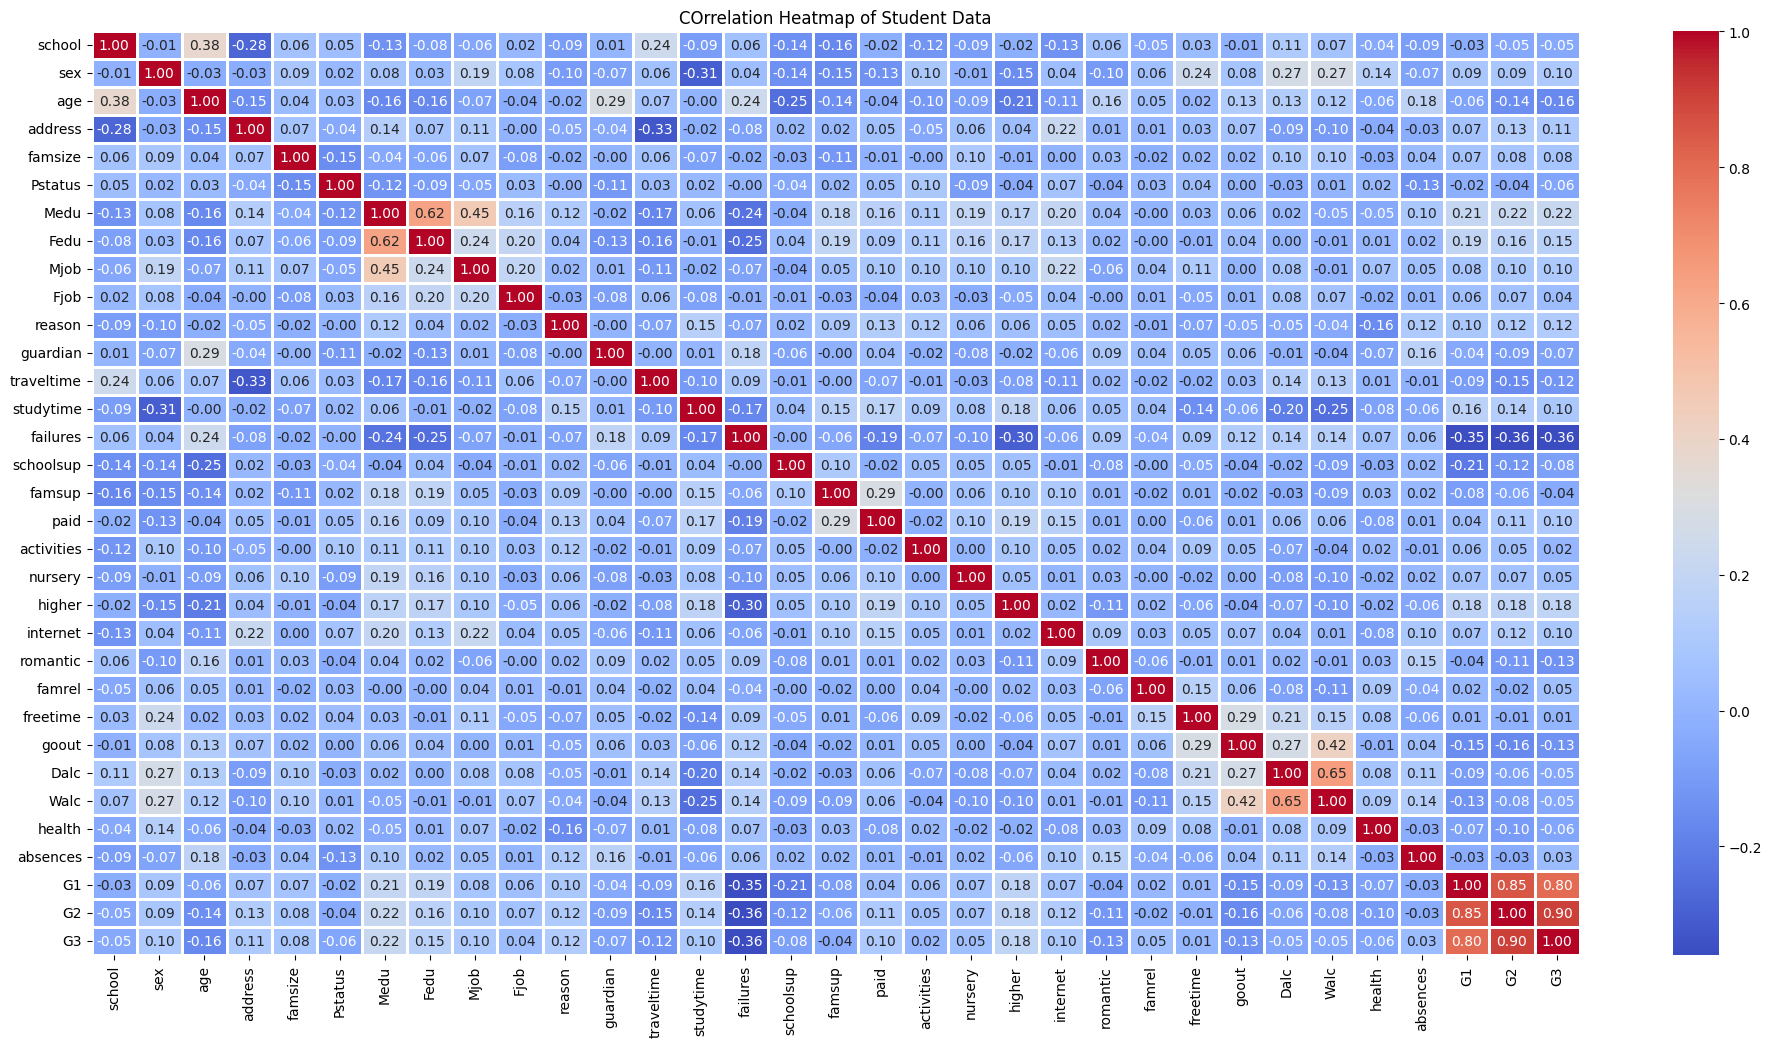

In [10]:
#correlation Heatmap
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.85)
plt.title('COrrelation Heatmap of Student Data')
plt.show()

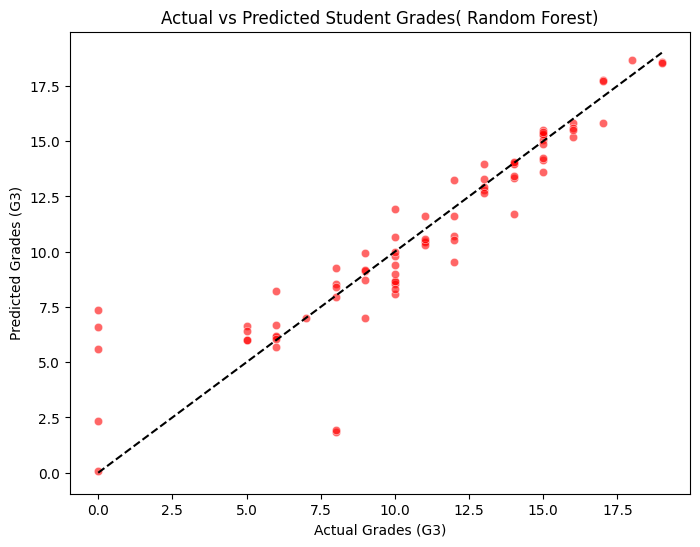

In [11]:
#Actual vs predicted plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred_rf,color='red',alpha=0.6)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='black',linestyle='--') #perfect predictions line
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades (G3)')
plt.title('Actual vs Predicted Student Grades( Random Forest)')
plt.show()

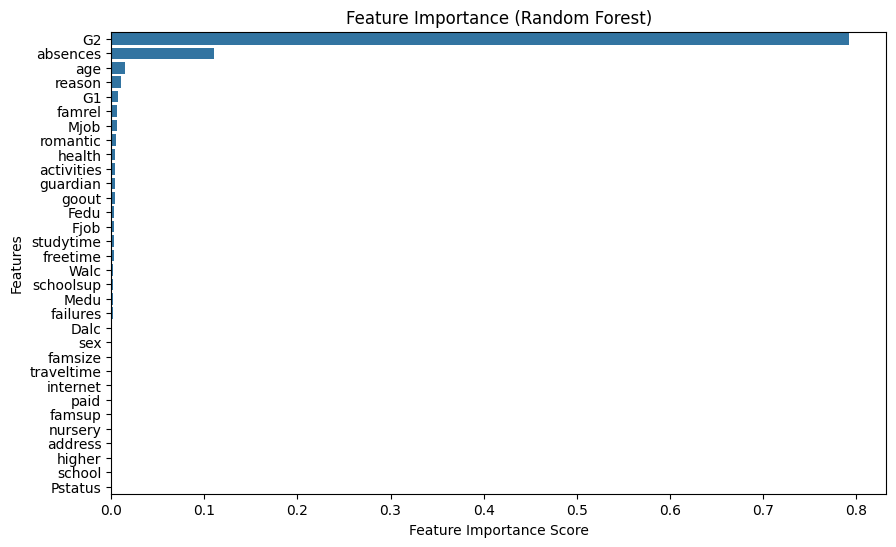

In [12]:
feature_importance= pd.Series(rf.feature_importances_,index=X.columns)
feature_importance= feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y= feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [13]:
# Running Manual Prediction

#Fucntion for dynamic user input and prediction
def predict_student_performance():
  import numpy as np

  print("Enter student details for prediction:")

  X= df.drop(columns=['G3']) # features

  user_data={}
  for col in X.columns:
    value= input(f"Enter value for {col}:")
    try:
      user_data[col]= float(value) #Convert numerical inputs
    except ValueError:
      if col in label_encoder:
        if value in label_encoder[col].classes_:
          user_data[col]= label_encoder[col].transform([value])[0]
        else:
          print(f"Invalid input for {col}, default to 0.")
          user_data[col]=0
      else:
        print(f"Invlaid input for {col},defaulting to 0.")
        user_data[col]=0

  #convert to dataframe
  user_df= pd.DataFrame([user_data])

  #make predictions
  prediction = rf.predict(user_df)
  print(f"predicted Final grades(G3):{prediction[0]:.2f}")

# Run the fucntion to take user input
predict_student_performance()

Enter student details for prediction:
Enter value for school:GP
Enter value for sex:F
Enter value for age:17
Enter value for address:U
Enter value for famsize:GT3
Enter value for Pstatus:T
Enter value for Medu:4
Enter value for Fedu:2
Enter value for Mjob:teacher
Enter value for Fjob:other
Enter value for reason:course
Enter value for guardian:mother
Enter value for traveltime:1
Enter value for studytime:2
Enter value for failures:0
Enter value for schoolsup:no
Enter value for famsup:yes
Enter value for paid:no
Enter value for activities:yes
Enter value for nursery:yes
Enter value for higher:yes
Enter value for internet:yes
Enter value for romantic:no
Enter value for famrel:4
Enter value for freetime:3
Enter value for goout:2
Enter value for Dalc:1
Enter value for Walc:1
Enter value for health:5
Enter value for absences:4
Enter value for G1:12
Enter value for G2:13
predicted Final grades(G3):13.51
